In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('exoplanets_outlier_handled.csv')

In [5]:
df.isnull().sum() #ensuring data is cleaned

planet_name           0
star_name             0
default_flag          0
sy_snum               0
sy_pnum               0
                     ..
planet_temperature    0
planet_period         0
semi_major_axis       0
discovery_method      0
is_transiting         0
Length: 133, dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
# Get all numerical columns automatically
specific_columns = [
                'planet_period_x', 'semi_major_axis_x', 'planet_radius_x',
                'pl_bmasse', 'pl_orbeccen', 'pl_insol', 'pl_eqt', 'star_temperature_x', 'star_radius_x', 'star_mass_x',
                'st_met', 'st_logg', 'sy_dist'
            ]

In [13]:
# Function to identify outliers using IQR method
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Identify outliers for each numeric column
for column in specific_columns:
    if column in df.columns and df[column].notna().any():  # Check if column exists and has non-null values
        outliers, lower_bound, upper_bound = find_outliers_iqr(df, column)
        print(f"Outliers in {column}:")
        print(f"  Number of outliers: {len(outliers)}")
        print(f"  Lower bound: {lower_bound:.4f}")
        print(f"  Upper bound: {upper_bound:.4f}")
        
        print("\n" + "-"*50 + "\n")

Outliers in planet_period_x:
  Number of outliers: 6667
  Lower bound: -13.6309
  Upper bound: 38.1724

--------------------------------------------------

Outliers in semi_major_axis_x:
  Number of outliers: 21464
  Lower bound: 0.1006
  Upper bound: 0.1006

--------------------------------------------------

Outliers in planet_radius_x:
  Number of outliers: 13995
  Lower bound: 1.5450
  Upper bound: 3.0250

--------------------------------------------------

Outliers in pl_bmasse:
  Number of outliers: 6272
  Lower bound: 210.0000
  Upper bound: 210.0000

--------------------------------------------------

Outliers in pl_orbeccen:
  Number of outliers: 4101
  Lower bound: 0.0000
  Upper bound: 0.0000

--------------------------------------------------

Outliers in pl_insol:
  Number of outliers: 16708
  Lower bound: 85.4800
  Upper bound: 85.4800

--------------------------------------------------

Outliers in pl_eqt:
  Number of outliers: 16638
  Lower bound: 795.0000
  Upper bound

In [10]:
updated_exoplanets = pd.read_csv("updated_exoplanets.csv")  
exoplanets_outlier_handled = pd.read_csv("exoplanets_outlier_handled.csv")

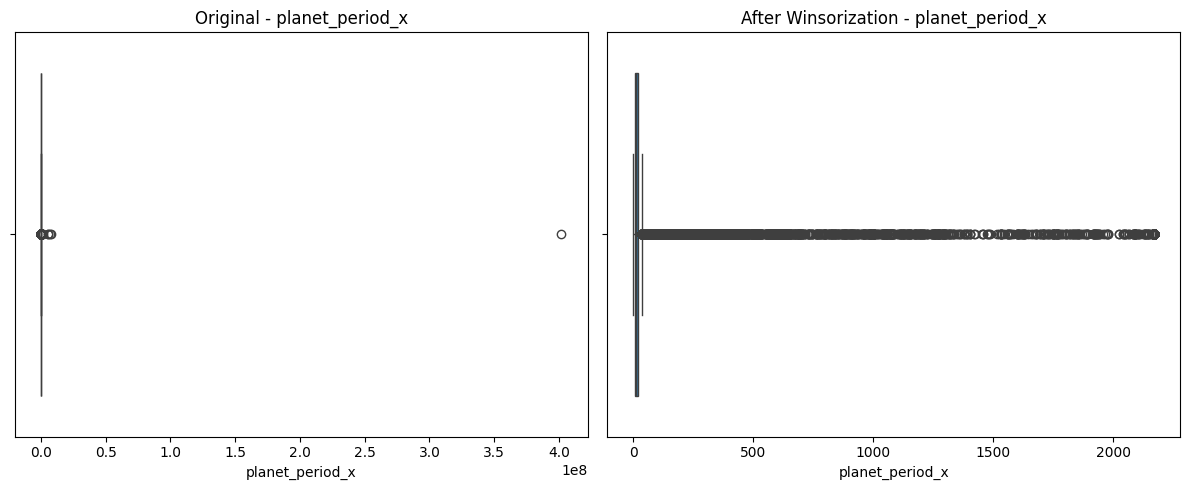

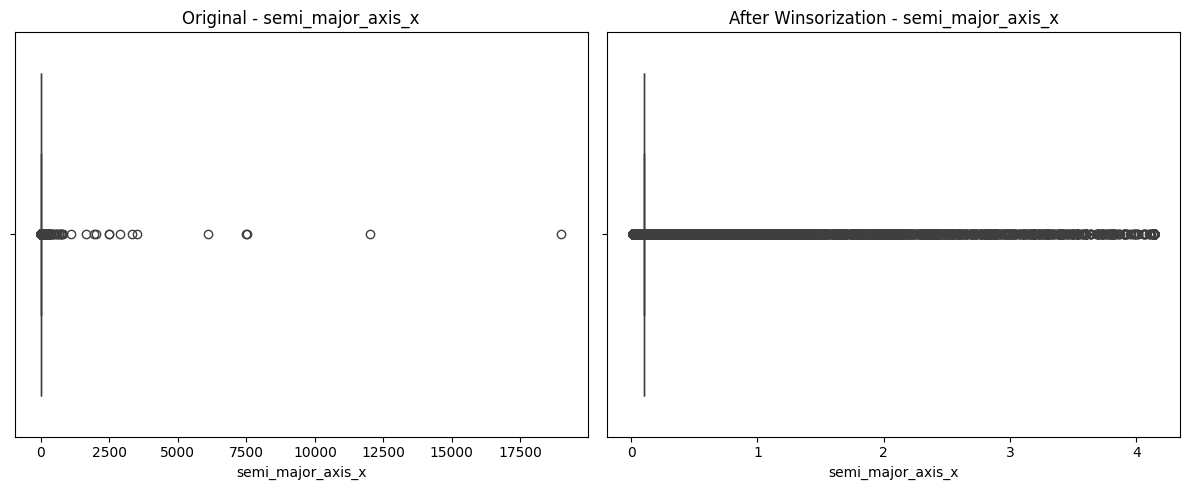

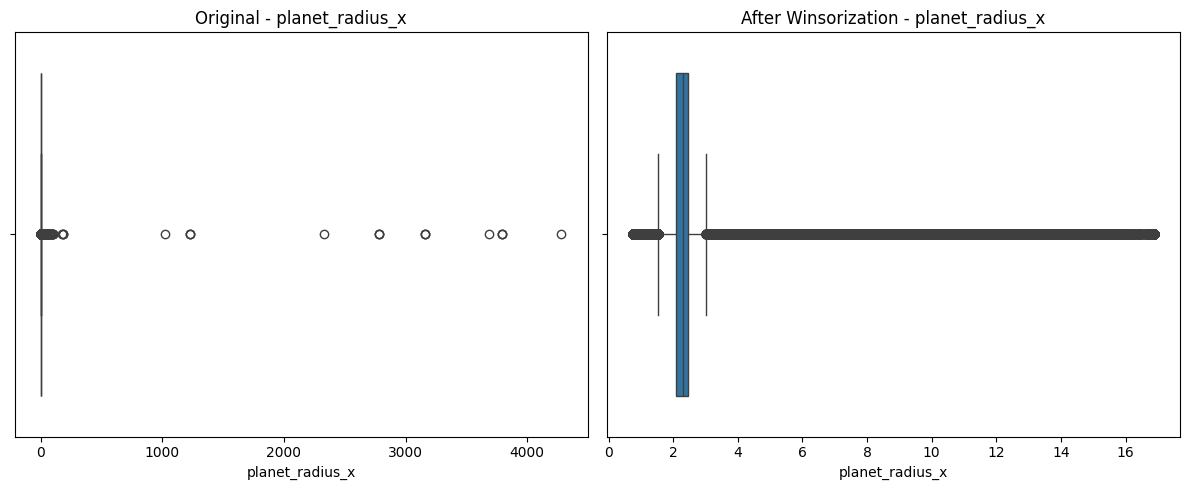

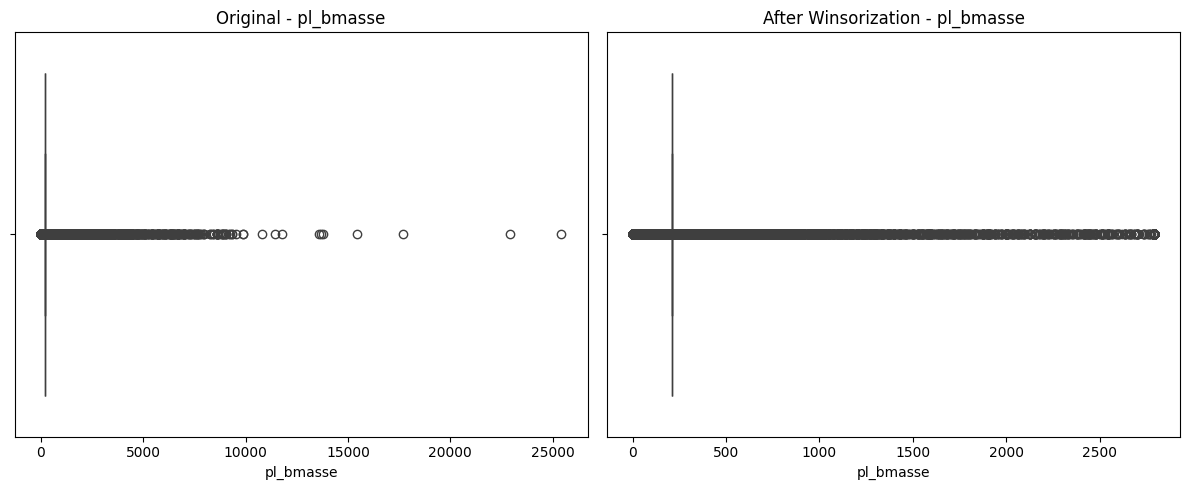

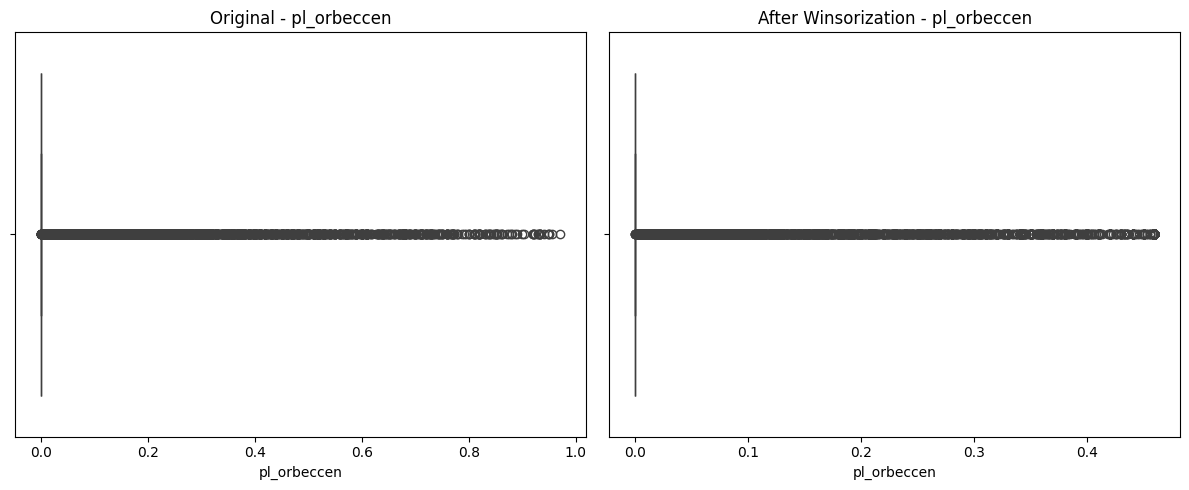

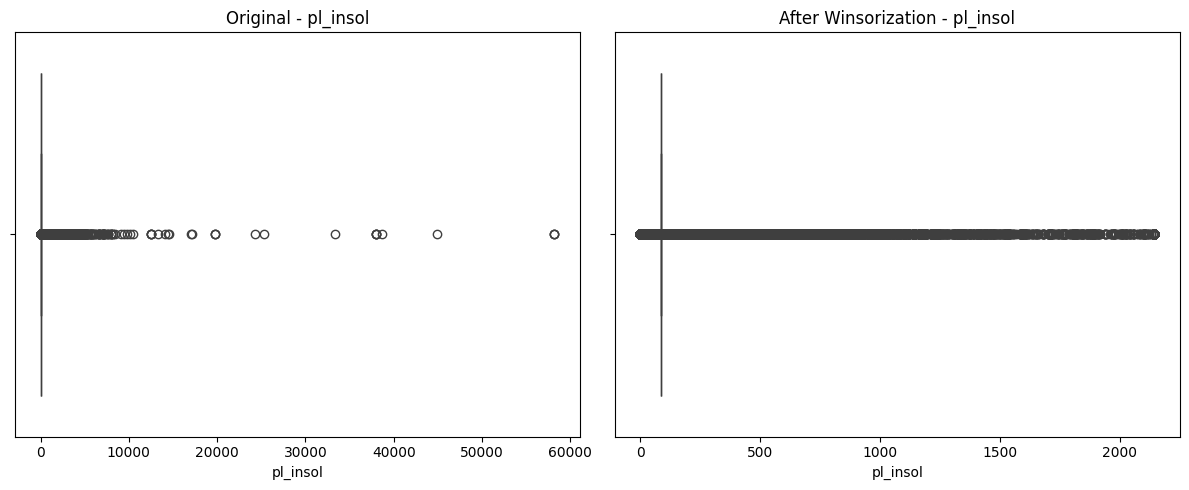

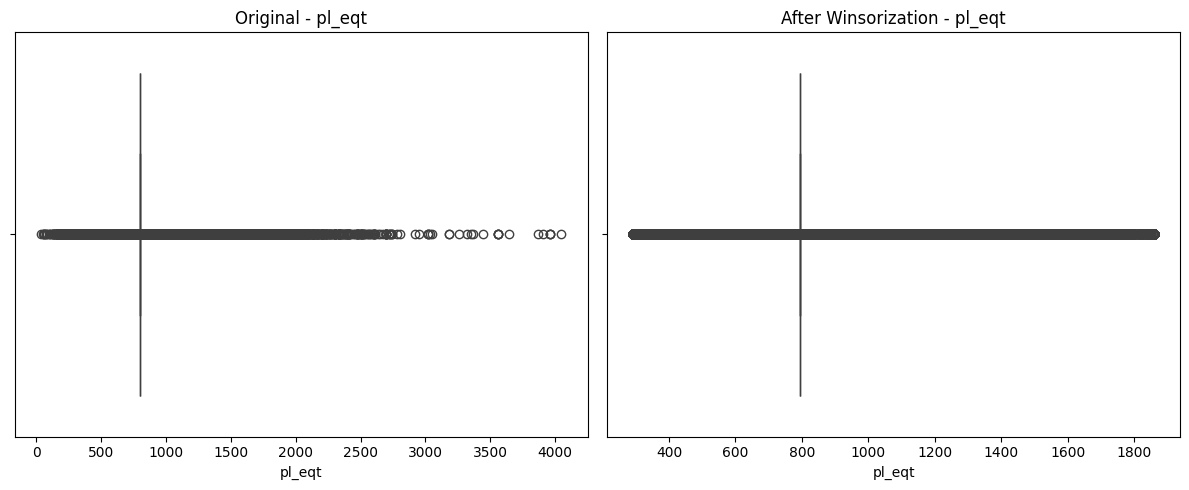

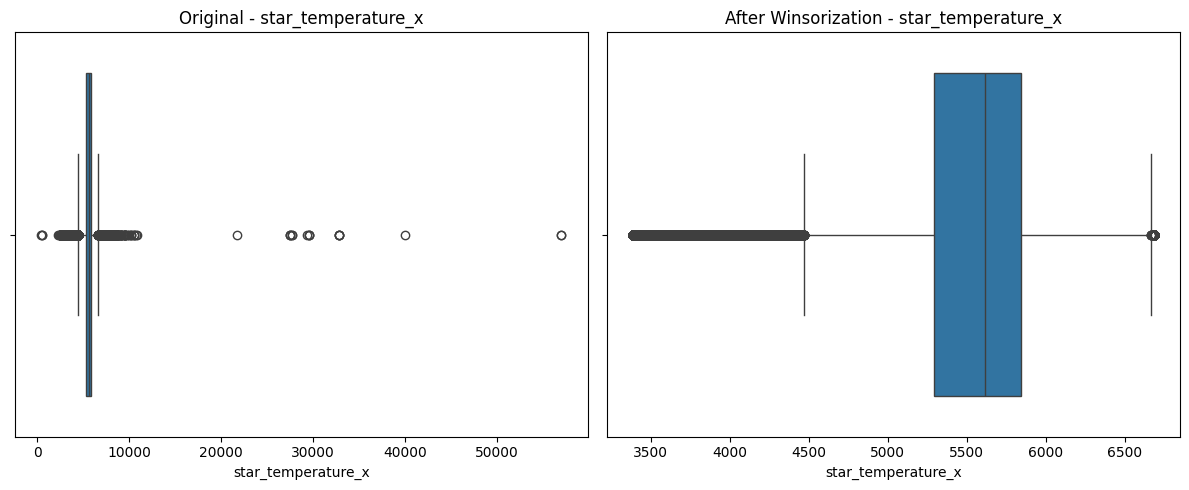

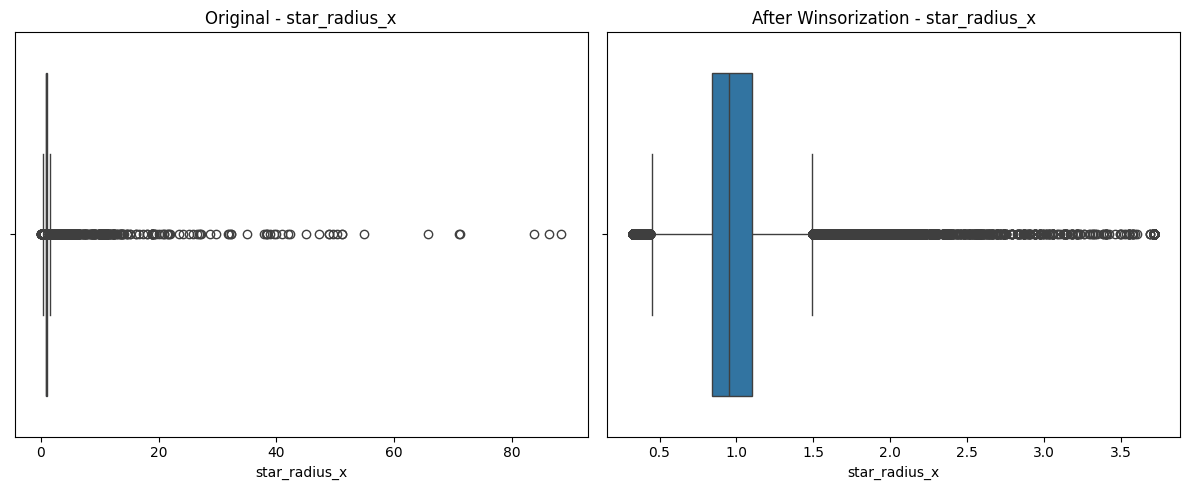

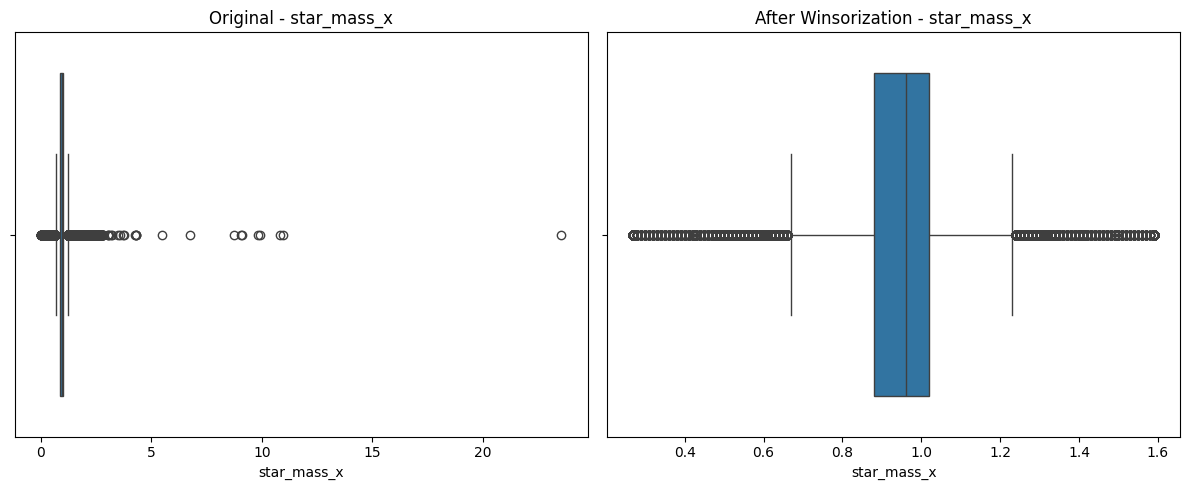

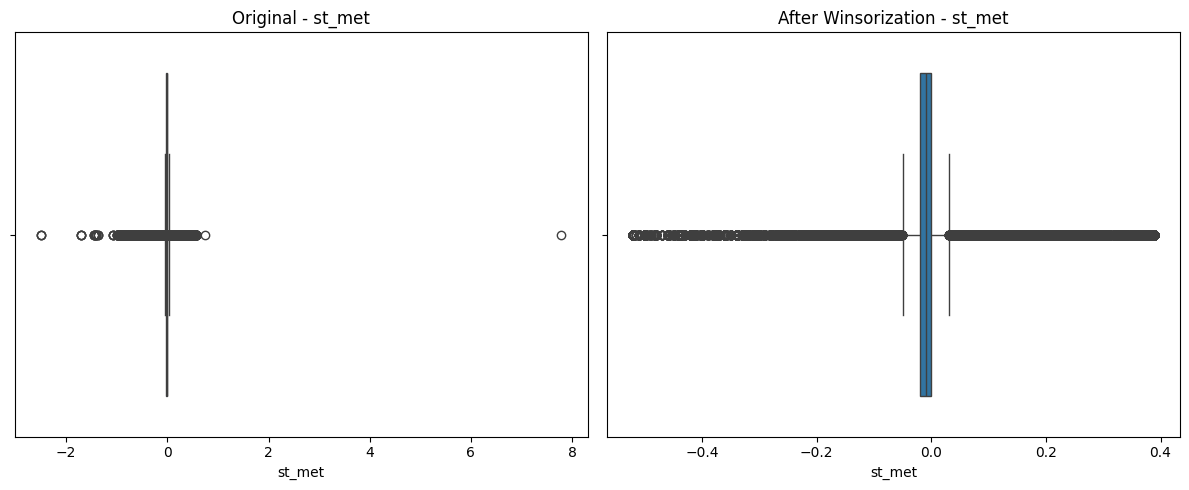

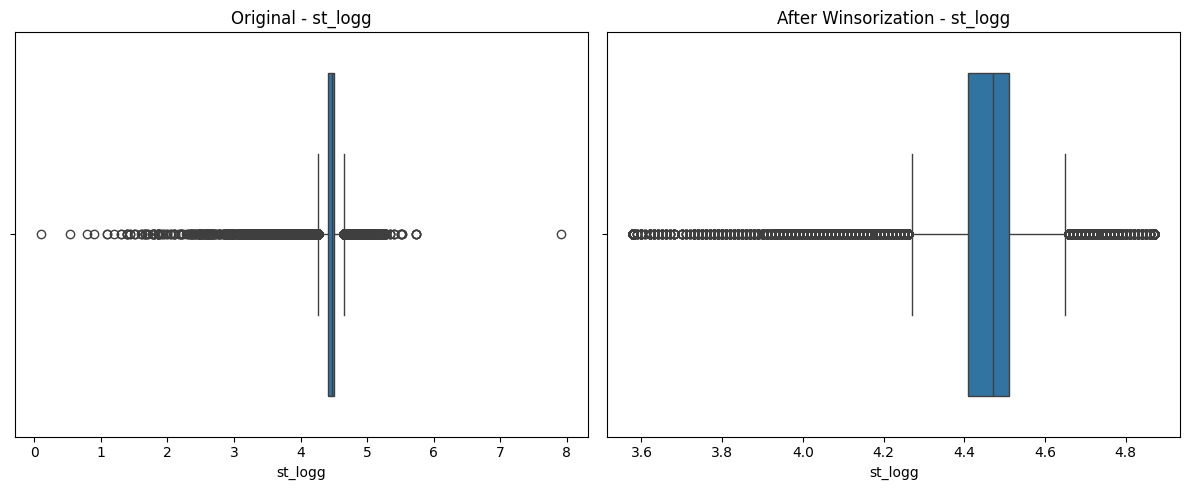

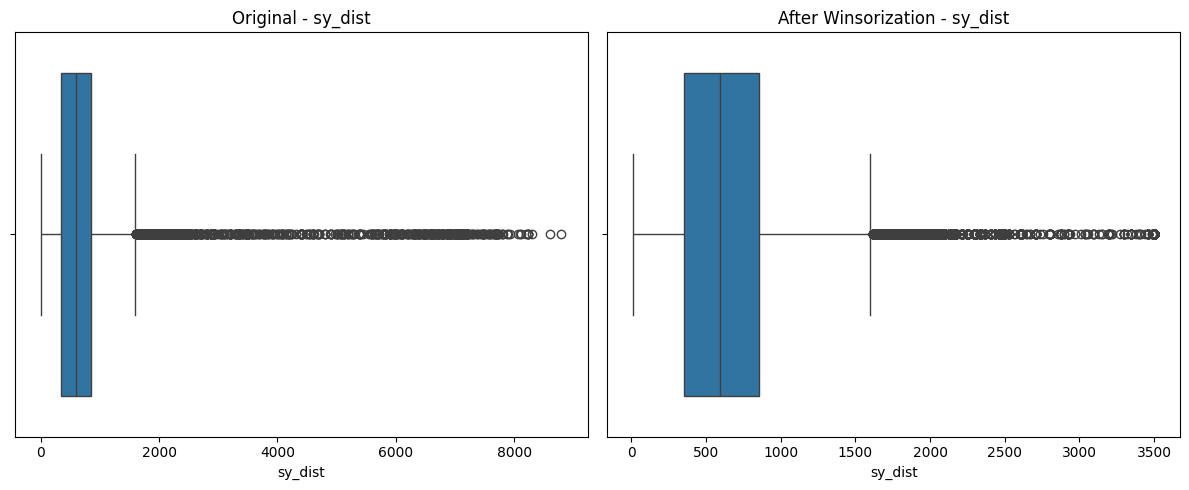

In [14]:
# Compare box plots before and after outlier handling
for column in specific_columns:
    if column in updated_exoplanets.columns and column in exoplanets_outlier_handled.columns:
        plt.figure(figsize=(12, 5))

        # Original dataset
        plt.subplot(1, 2, 1)
        sns.boxplot(x=updated_exoplanets[column])
        plt.title(f'Original - {column}')
        plt.xlabel(column)

        # Modified dataset (after outlier handling)
        plt.subplot(1, 2, 2)
        sns.boxplot(x=exoplanets_outlier_handled[column])
        plt.title(f'After Winsorization - {column}')
        plt.xlabel(column)

        plt.tight_layout()
        plt.show()

In [12]:
# Check 1st and 99th percentile for all columns
for column in specific_columns:
    if column in updated_exoplanets.columns and column in exoplanets_outlier_handled.columns:
        print(f"\nColumn: {column}")
        print("Before Winsorization:")
        print(updated_exoplanets[column].describe(percentiles=[0.01, 0.99]))

        print("\nAfter Winsorization:")
        print(exoplanets_outlier_handled[column].describe(percentiles=[0.01, 0.99]))


Column: planet_period_x
Before Winsorization:
count    4.597500e+04
mean     9.500948e+03
std      1.875934e+06
min      9.070629e-02
1%       7.698536e-01
50%      1.035536e+01
99%      2.170520e+03
max      4.020000e+08
Name: planet_period_x, dtype: float64

After Winsorization:
count    45975.000000
mean        62.614376
std        265.871081
min          0.769854
1%           0.769854
50%         10.355359
99%       2170.135200
max       2170.520000
Name: planet_period_x, dtype: float64

Column: semi_major_axis_x
Before Winsorization:
count    45975.000000
mean         2.241573
std        124.979306
min          0.004400
1%           0.018100
50%          0.100600
99%          4.140000
max      19000.000000
Name: semi_major_axis_x, dtype: float64

After Winsorization:
count    45975.000000
mean         0.226384
std          0.568041
min          0.018100
1%           0.018100
50%          0.100600
99%          4.140000
max          4.140000
Name: semi_major_axis_x, dtype: float64
